## PROJECT-2: PART-3 - Machine Learning: Artificial Neural Network

#### Objective: Applying Logistic Regression and Artificial Neural Network Models to test the effectiveness of Natural Language Processing Sentiment Scores in predicting trade decisions based On algorithmic trading 

---

### Code Overview

---

In [151]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten

%matplotlib inline

In [152]:
# Set a random seed for TensorFlow to allow reproducible testing results
#tf.random.set_seed(126)

In [153]:
# Read in data
df = pd.read_csv("Sentiment_Scores_1.csv")
sentiment_scores = df.dropna()
data = sentiment_scores.drop(columns=['Unnamed: 0','Stock','Date','JSON File Name'])
data.head()

,Buy/Sell,Sentiment Score
1,1,-0.4767
2,1,0.9075
3,1,0.5236
5,1,0.2023
6,1,0.9756


In [154]:
# Creating Feature and Target
X = data['Sentiment Score']
y = data['Buy/Sell']
# Creating training and testing datasets for logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=78, 
                                                    )

In [218]:
# Define the model
number_inputs = 367
number_hidden_nodes = 37

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=1, activation="relu"))
nn.add(Dense(units=number_hidden_nodes, input_dim=37, activation="relu"))
nn.add(Dense(units=number_hidden_nodes, input_dim=37, activation="relu"))
nn.add(Dense(1, activation="hard_sigmoid"))
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [219]:
# Printing Model Summary
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 37)                74        
_________________________________________________________________
dense_62 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_63 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 38        
Total params: 2,924.0
Trainable params: 2,924
Non-trainable params: 0.0
_________________________________________________________________


8. Fit the model with `100` epochs.

In [220]:
# Fit the model
model = nn.fit(X_train, y_train, epochs=10)

Epoch 1/10
367/367 [==============================] - 0s - loss: 0.6932 - acc: 0.5259     
Epoch 2/10
367/367 [==============================] - 0s - loss: 0.6919 - acc: 0.5341     
Epoch 3/10
367/367 [==============================] - 0s - loss: 0.6916 - acc: 0.5177     
Epoch 4/10
367/367 [==============================] - 0s - loss: 0.6913 - acc: 0.5313     
Epoch 5/10
367/367 [==============================] - 0s - loss: 0.6907 - acc: 0.5341     
Epoch 6/10
367/367 [==============================] - 0s - loss: 0.6902 - acc: 0.5341     
Epoch 7/10
367/367 [==============================] - 0s - loss: 0.6902 - acc: 0.5313     
Epoch 8/10
367/367 [==============================] - 0s - loss: 0.6899 - acc: 0.5341     
Epoch 9/10
367/367 [==============================] - 0s - loss: 0.6899 - acc: 0.5341     
Epoch 10/10
367/367 [==============================] - 0s - loss: 0.6895 - acc: 0.5341     


9. Plot the loss function and accuracy.

In [214]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6798818474862633, Accuracy: 0.5365853716687459


In [166]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [169]:
df_plot

,loss,acc
1,0.693865,0.525886
2,0.691447,0.520436
3,0.691255,0.523161
4,0.691119,0.520436
5,0.690546,0.514986
6,0.690728,0.506812
7,0.690709,0.509537
8,0.690549,0.514986
9,0.690458,0.517711
10,0.690545,0.517711


In [ ]:
# Plot the loss
df_plot.plot(y="loss")

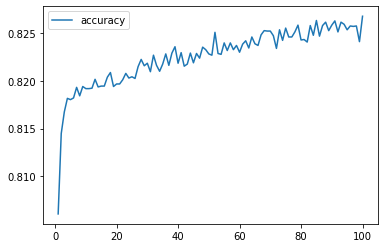

In [14]:
# Plot the accuracy
df_plot.plot(y="accuracy")
